## 基于维基百科的词向量构建

#### 1. obtain  chinesse corpus
1.1 Download Wikipedia Chinese Corpus.
https://dumps.wikimedia.org/zhwiki/20190720/

1.2 Using wikiextractor to extract the wikipedia corpus.
https://github.com/attardi/wikiextractor 

#### 2. text preprocessing
 1. json_to_text.py:   将json源文件提取为text文件.
 
 2. tradi_to_simpl.py:  将繁体字转换为简体.
 
 3. jieba_sge.py:      jieba分词并过滤标点符号
 
 4. trainWord2Vec.py:   训练词向量，保存model
 
 5. draw_Word2Vec.ipynb:  利用t-SNE可视化词向量

#### 3. Visualizing Word Vectors with t-SNE

In [1]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Administrator\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [3]:
path = './wiki_seg.100_30_200.model'
model = Word2Vec.load(path)

C:\Users\Administrator\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [6]:
testwords = ['电影','父亲', '篮球']
for i in range(len(testwords)):
    res = model.most_similar(testwords[i])
    print('{}--{}'.format(testwords[i], res))

电影--[('上映', 0.8326194286346436), ('执导', 0.817007303237915), ('编剧', 0.7957016825675964), ('导演', 0.7930326461791992), ('一部', 0.7781258821487427), ('主演', 0.7466303110122681), ('演员', 0.6425078511238098), ('改编', 0.6415080428123474), ('饰演', 0.6329588890075684), ('拍摄', 0.6264998912811279)]
父亲--[('母亲', 0.9131483435630798), ('儿子', 0.8072159290313721), ('妻子', 0.7935041785240173), ('父母', 0.7669385671615601), ('出生', 0.7639495134353638), ('女儿', 0.7445064783096313), ('家', 0.7050644755363464), ('结婚', 0.6832796335220337), ('一位', 0.6801605224609375), ('去世', 0.6497785449028015)]
篮球--[('运动员', 0.8059029579162598), ('奥运会', 0.7892021536827087), ('职业', 0.7784964442253113), ('男子篮球', 0.7607581615447998), ('金牌', 0.7546209692955017), ('效力', 0.7528027892112732), ('司职', 0.7143375277519226), ('夏季', 0.6876363754272461), ('亚洲', 0.6824042797088623), ('乒乓球', 0.6608052253723145)]


C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


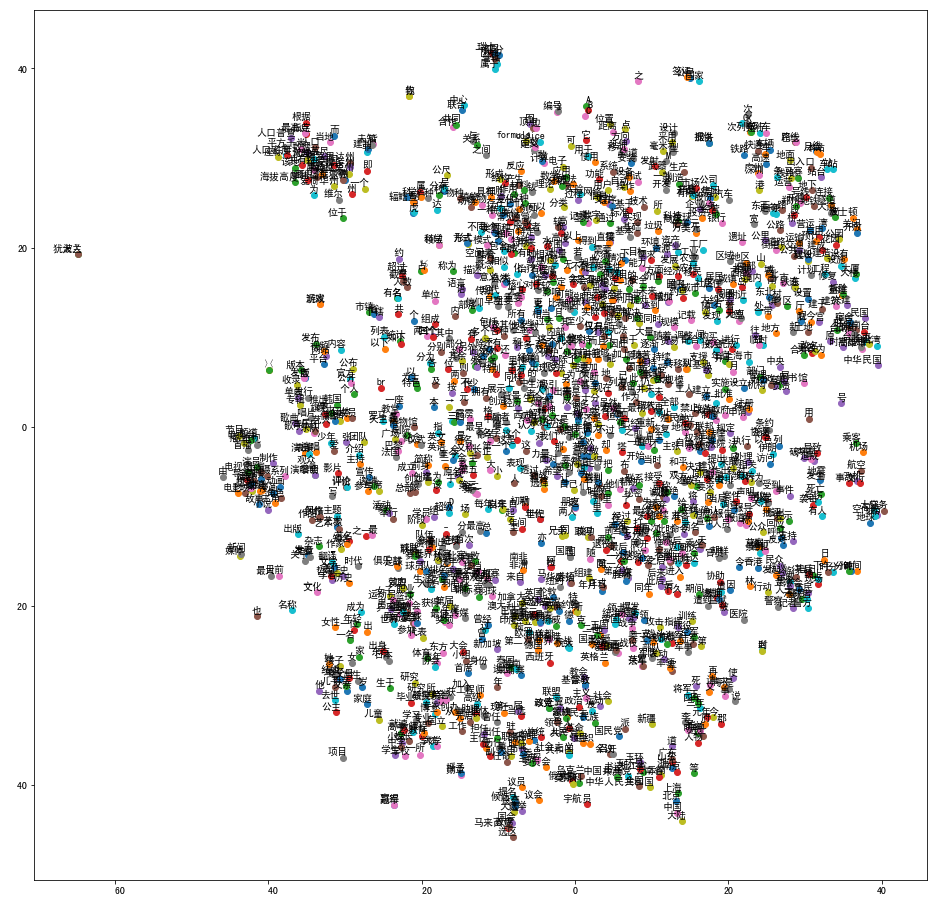

In [5]:
tsne_plot(model)